# Inferential Modelling  Vs. Predictive Modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Learning Objectives

- Describe the hallmarks of inferential statistics, and to contrast them with the hallmarks of predictive statistics
- Relate the goals of model-building to expected value, bias and variance
- Define error as a function of prediction error and irreducible error
- Define prediction error as a combination of bias and variance

# Inferential Statistics in a Nutshell

In Phase 1 we looked at *descriptive* statistics: starting with a dataset and making various observations (overall shape, histogram, outliers, etc.) as well as calculations of quantities that can characterize the dataset as a whole (mean, median, mode, variance, standard deviation, quartiles, percentiles, etc.).

At the beginning of Phase 2 we moved into inferential statistics. The main idea here is to imagine that *we don't have* (or anyway cannot *measure*) all the data of interest.

And this is, of course, the typical situation. Consider:

- A zoologist wanting to know the typical lifespan of a Siberian tiger
- A cosmologist wanting to know the mass of a normal white dwarf star
- A businesswoman wanting to know how many M&M's her customers should expect to find in their Party Size bags
- A botanist wanting to know how tall California redwoods usually grow

![](images/tiger.jpg)

<a href="https://commons.wikimedia.org/wiki/File:Siberian_Tiger.jpg">en:User:Cburnett</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

The zoologist could, in principle:

1. keep track of every currently existing Siberian tiger
2. record their (more or less) exact ages at their moments of death
3. add up those ages and divide by the number of tigers to calculate an average lifespan

––But **only** in principle. In all of these situations, there is no realistic or practical opportunity to check each relevant data point.

![](images/sampling.png)

<a href="https://commons.wikimedia.org/wiki/File:Simple_random_sampling.PNG">Dan Kernler</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

What we can do, however, is to check *some* of the data points we want to check. That is, we'll draw a *sample* of data from our *population* of interest. We can then use the techniques of descriptive statistics to characterize our sample.

The hope, then, is that our sample will be *representative* of the population as a whole, which would justify our using facts about the sample to ***infer*** things about the population as a whole. Naturally we'll expect a certain amount of **error**: If I take the mean of a sample, $\bar{x}$ and project it as an estimate of the mean of the whole population, $\mu$, the estimate is bound to be imperfect. Etc. etc.

Inferential statistics makes all this precise. And that has been the bulk of the content of Phase 2.

Classically speaking, inference is a form of learning or of *increasing our knowledge*. So when conducting exercises in inferential statistics, the goal is ultimately **understanding**. If I am conducting a linear regression in an inferential mode, then:

- I will be very interested in the values of the coefficients, since these represent the effect of the associated factors on the target in question
- the more data I use to build the regression the better
- the fewer transformations of my data the better, since lots of transformations will impede transparency and comprehensibility
- fewer predictors may be better than more
- I will be very interested in respecting the assumptions of linear regression
- I'll probably choose `statsmodels` if working in Python

# Predictive Statistics in a Nutshell

The focus for predictive statistics is a bit different.

First, the goal is less on understanding and more (of course!) on making good *predictions* of future cases.

That means that I want the patterns I pick up on (in some dataset) to be patterns that will *recur* (in a similar dataset) in the future.

Needless to say, researchers may care *both* about understanding a process and about predicting the future. Science seems to be involve both. If I am performing a linear regression on data about cigarette smoking paired with data about lifespans, then I may want both to understand exactly how smoking affects lifespan and to make predictions for the future about how long smokers can expect to live.

![](images/crystall_ball.png)

<a href="https://commons.wikimedia.org/wiki/File:743-crystal-ball-1.svg">Vincent Le Moign</a>, <a href="https://creativecommons.org/licenses/by/4.0">CC BY 4.0</a>, via Wikimedia Commons

Nevertheless, the difference of emphasis can make for a difference in practice. If I am conducting a linear regression in a predictive mode, then:

- I won't particularly care about the values of the coefficients
- I may want to have two different datasets: one on which to build ("train") the regression and another on which to **evaluate** ("test") the regression. (*Did* the patterns that I picked up on in the first dataset recur in the second?)
- I won't particularly care about whether or how the data has been modified or transformed before subjecting it to regression analysis
- more predictors are probably better than fewer
- I won't care as much about respecting the assumptions of linear regression
- I'll probably choose `sklearn` if working in Python, since predictive statistics is at the heart of machine learning

Of course, to the extent that we give up on actually trying to *understand* the phenomenon that we are modeling, to that extent we are happy to let our models be **black boxes**. As we move deeper into the course and our models get ever more sophisticated, they will also become ever more like black boxes, for better or for worse.

# Predictive Modeling Theory

![which model is better](images/which_model_is_better.png)

[Netflix example](https://towardsdatascience.com/cultural-overfitting-and-underfitting-or-why-the-netflix-culture-wont-work-in-your-company-af2a62e41288)

## What Is a “Model”?

- A “model” is a general specification of relationships among variables. 
    + e.g. a linear regression, such as: $ Price = \beta_1*Time +  \beta_0 (+ \epsilon)$
- A “trained model” is a particular model that has been built using some training data.
    + If the model is **parametric** (like a linear regression), then it has parameters that have been calculated using the training data;
    + If the model is **non-parametric**, then it has (not parameters but) an algorithm that has been constructed using the training data.

## What Makes a Model Good?

- We don’t ultimately care about how well your model fits your data.
- What we really care about is how well your model describes the process that generated your data.
- Why? Because the data set you have is but one sample from a universe of possible data sets, and you want a model that would work for any data set from that universe.

## Return to Expected Value

- The expected value of a quantity is the weighted average of that quantity across all possible samples

![6 sided die](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/6sided_dice.jpg/600px-6sided_dice.jpg)

- for a 6 sided die, another way to think about the expected value is the arithmetic mean of the rolls of a very large number of independent samples.  

### The expected value of a 6-sided die is:

In [2]:
probs = 1/6
rolls = range(1, 7)

expected_value = sum([probs * roll for roll in rolls])
expected_value

3.5

## Defining model bias and variance

- Let's imagine we create a model that always predicts a roll of **3**.

- **The *bias* is the difference between the average prediction of our model and the average roll of the die as we roll more and more times**.
    - What is the bias of a model that always predicts 3?
    <details>
        <summary> Answer below</summary>
        0.5
    </details>
- **The *variance* is the average difference between each individual prediction and the average prediction of our model as we roll more and more times**.
    - What is the variance of that model?
    <details>
    <summary> Answer below
    </summary>
    0
    </details>

## Defining Error: prediction error and irreducible error

### Regression fit statistics are often called “error”

- Sum of Squared Errors (SSE)
 $ {\displaystyle \operatorname {SSE} =\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.} $
 - Mean Squared Error (MSE) 
 
 $ {\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.} $
 
 - Root Mean Squared Error (RMSE)  
 $ {\displaystyle \operatorname 
  {RMSE} =\sqrt{MSE}} $

 All are calculated using residuals    

![residuals](images/residuals.png)

### Exercise

 - Fit a quick and dirty linear regression model
 - Store predictions in the y_hat variable using predict() from the fit model
 - Handcode SSE
 - Divide by the length of array to find Mean Squared Error
 - Check that your MSE equals sklearn's mean_squared_error function 

In [3]:
df = pd.read_csv('data/king_county.csv', index_col='id')
df = df.iloc[:, :12]

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
id,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0


<AxesSubplot:>

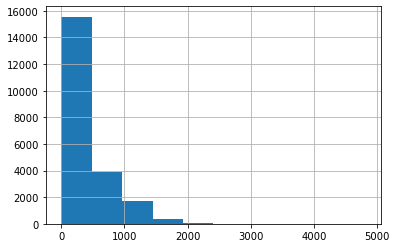

In [5]:
df['sqft_basement'].hist()

In [6]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [7]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [9]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [10]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.1 MB


In [13]:
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
id,,,,,,,,,,,,
2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580


In [14]:
df[df['bedrooms'] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
id,,,,,,,,,,,,
6306400140,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0
3918400017,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0
1453602309,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0
6896300380,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0
2954400190,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0
2569500210,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0
2310060040,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0
3374500520,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0
7849202190,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0


In [15]:
X = df.drop('price', axis=1)
y = df.price

# Build the regression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [16]:
coefs = list(lr.coef_)

In [17]:
lr.score(X, y)

0.6054901795029908

In [21]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
id,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0
...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0


In [18]:
lr.predict(X)

array([287405.80141893, 538771.09612668, 139572.27231649, ...,
       293303.52027278, 445785.96259248, 293390.64261021])

In [26]:
p1 = X.iloc[0].values

In [27]:
p1

array([3.00e+00, 1.00e+00, 1.18e+03, 5.65e+03, 1.00e+00, 0.00e+00,
       0.00e+00, 3.00e+00, 7.00e+00, 1.18e+03, 0.00e+00])

In [30]:
((lr.coef_ * X.iloc[0].values).sum()) + lr.intercept_

287405.8014189333

In [31]:
p1.reshape(1, -1)

array([[3.00e+00, 1.00e+00, 1.18e+03, 5.65e+03, 1.00e+00, 0.00e+00,
        0.00e+00, 3.00e+00, 7.00e+00, 1.18e+03, 0.00e+00]])

In [29]:
lr.predict(p1.reshape(1, -1))

array([287405.80141893])

In [32]:
coefs

[-33784.47163251549,
 -14627.334433576347,
 135.05562599961104,
 -0.3179647351425956,
 -2830.888895029131,
 582168.9015360795,
 60638.67470126459,
 53444.23492296796,
 103154.99288840458,
 52.94403558254044,
 82.1115903422899]

In [33]:
# Calculate error
y_hat = lr.predict(X)
resids = y - y_hat
sae = abs(resids).sum()
mae = sae / len(resids)
sse = (resids**2).sum()
mse = sse / len(resids)
rmse = np.sqrt(mse)

# Compare with sklearn
print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

230587.3189849997
230587.3189849997


In [34]:
mae

151618.51239409376

In [35]:
mean_squared_error(y, y_hat, squared=True)

53170511676.69

In [36]:
mean_squared_error(y, y_hat, squared=False)

230587.3189849997

In [37]:
from sklearn.metrics import explained_variance_score

In [38]:
explained_variance_score(y, y_hat)

0.6054901795029908

## Defining prediction error as a combination of bias and variance

$\Large Total\ Error\ = Prediction\ Error+ Irreducible\ Error$

Our prediction error can be further broken down into error due to bias and error due to variance.

$\Large Total\ Error = Model\ Bias^2 + Model\ Variance + Irreducible\ Error$

**Model Bias** is the expected prediction error of the trained model.

> In other words, if you were to train multiple models on different samples, what would be the average difference between the prediction and the real value?

**Model Variance** is the expected variation in predictions, relative to your trained model.

> In other words, what would be the average difference between any one model's prediction and the average of all the predictions?

**Bias vs. variance refers ultimately to the *accuracy* vs. *consistency* of the models trained by your algorithm.**

![target_bias_variance](images/target.png)

http://scott.fortmann-roe.com/docs/BiasVariance.html

# Coming up next

It goes without saying that we would generally like our models to have both low bias and low variance. But what is not so obvious is that, unfortunately, as one tends to go down, the other tends to go up. Moreover, we shall often be able to tweak model **hyperparameters** with the purpose of decreasing the bias (even if that also means increasing the variance) or of decreasing the variance (even if that also means decreasing the bias). And so we shall soon come to appreciate the ***bias-variance tradeoff*** as it applies to machine learning models.